In [6]:
!pip install climateservaccess==1.0.0

REQUEST SUBMITTED: NASA_IMERG_Late [26], 01/01/2023 to 01/30/2023, average
ID: 5765d460-8c23-42fa-b919-6abed8a3a211
32.8%
100.0%
Data retrieved successfully.


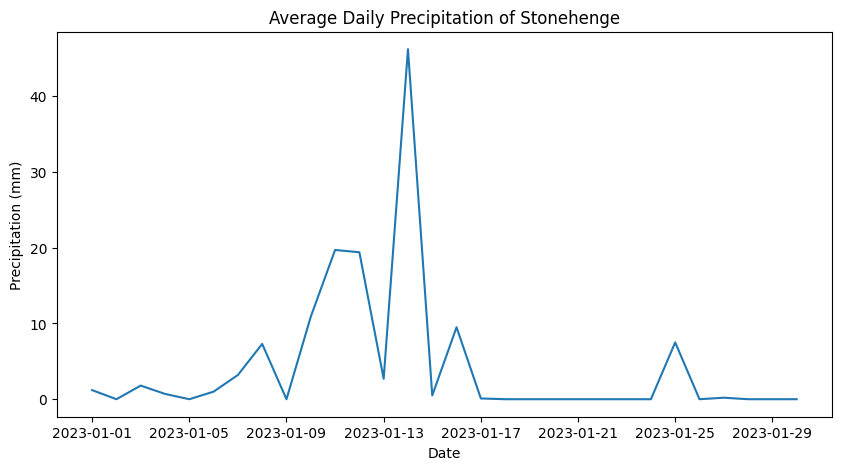

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import climateservaccess as ca

# Define parameters
data_type = 26 # see ca.datatypeDict for data types
start_date = '01/01/2023' 
end_date = '01/30/2023'
operation_type = 'average' # valid options are: 'average', 'max', 'min'
lat = 51.17912455395276 # latitude of Stonehenge
lon = -1.8262705029300066 # longitude of Stonehenge
res = 0.01 # resolution in degrees
polygon = ca.getBox(lat, lon, res) # defines box of width res around lat, lon

# Get dataframe with data from ClimateSERV
df = ca.getDataFrame(data_type, start_date, end_date, operation_type, polygon)

# Select data from df and store inside data_df
data_df = pd.DataFrame(df['data'].to_list())
# Convert the date column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Plot the data
plt.figure(figsize=(10,5))
plt.plot(data_df['date'], data_df['raw_value'])
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Average Daily Precipitation of Stonehenge')
plt.show()

In [5]:
## Get time intervals (in days) for each datatype and each interval type (0, 1, 2) ##
## SPOILER ALERT: Each interval type produces the exact same time interval ##

import pandas as pd
import matplotlib.pyplot as plt
from climateservaccess import getDataFrame, getBox, datatypeDict

# Define some parameters
start_date = '01/11/2024'
end_date = '01/15/2024'
LIS_res = 1
REGION = 'gambia'
gambia_box = [[-16.85, 13.85], [-16.85, 13.05], [-13.78, 13.05], [-13.78, 13.85], [-16.85, 13.85]]


df = getDataFrame(7, start_date, end_date, 'Min', gambia_box)

# Select data from df
temp_data = pd.DataFrame(df['data'].to_list())

temp_data.head()


REQUEST SUBMITTED: CCSM_Ensemble_1_Precipitation [7], 01/11/2024 to 01/15/2024, Min
ID: a666b0a1-c07d-4924-b5c6-28166975e465
32.8%
100.0%
Data retrieved successfully.


,year,month,day,date,epochTime,value,raw_value,NaN,isodate
0,2024,1,11,01/11/2024,1704931200,{'min': 0.0},0.0,0.0,01/11/2024
1,2024,1,12,01/12/2024,1705017600,{'min': 0.0},0.0,0.0,01/12/2024
2,2024,1,13,01/13/2024,1705104000,{'min': 0.0},0.0,0.0,01/13/2024
3,2024,1,14,01/14/2024,1705190400,{'min': 0.0},0.0,0.0,01/14/2024
4,2024,1,15,01/15/2024,1705276800,{'min': 0.0},0.0,0.0,01/15/2024


In [3]:
## Testing the speed of the getDataFrame function for single-day requests ##

import pandas as pd
import time
import climateservaccess as ca

# Define parameters
data_type = 663 # see ca.datatypeDict for data types
start_date = '01/01/2024' 
end_date = '01/11/2024'
operation_type = 'average' # valid options are: 'average', 'max', 'min'
lat = 13.48681
lon = -16.48787
res = 0.01 # resolution in degrees
n = 3 # number of data points to collect

start = time.time()

with open('single_day_test.csv', 'w') as f:
    f.write('latitude,longitude,runoff\n')
    for i in range(n):
        lon += res
        polygon = ca.getBox(lat, lon, res) # defines box of width res around lat, lon
        f.write(f"{lat},{lon},")

        df = ca.getDataFrame(data_type, start_date, end_date, operation_type, polygon)
        if df is None:
            f.write("NaN\n")
            continue
        data_df = pd.DataFrame(df['data'].to_list())

        f.write(f"{data_df['raw_value'][0]}\n") 

end = time.time()
print(f"Time elapsed for {n} single-day data points = {end - start} seconds")
print(f"Average time per data point = {(end - start)/n} seconds")


REQUEST SUBMITTED: LIS_Runoff [663], 01/01/2024 to 01/11/2024, average
Data retrieved successfully.
REQUEST SUBMITTED: LIS_Runoff [663], 01/01/2024 to 01/11/2024, average
Data retrieved successfully.
REQUEST SUBMITTED: LIS_Runoff [663], 01/01/2024 to 01/11/2024, average
Data retrieved successfully.
Time elapsed for 3 single-day data points = 15.570242643356323 seconds
Average time per data point = 5.190080881118774 seconds


In [1]:
## Testing getCSV function ##

import pandas as pd
import time
import climateservaccess as ca

# Define parameters
data_type = 26
start_date = '01/01/2015' 
end_date = '12/31/2015'
operation_type = 'average' # valid options are: 'average', 'max', 'min'
lat = 13.48681
lon = -16.48787
res = 0.1 # resolution in degrees
polygon = ca.getBox(lat, lon, res) # defines box of width res around lat, lon
n = 1

start = time.time()

for i in range(n):
    ca.getCSV(data_type, start_date, end_date, operation_type, polygon, 'get_CSV_Test.csv')

end = time.time()
print(f"Time elapsed for {n} CSVs = {end - start} seconds")
print(f"Average time per CSV = {(end - start)/n} seconds")


REQUEST SUBMITTED: NASA_IMERG_Late [26], 01/01/2015 to 12/31/2015, average
> Data retrieved successfully.                    
> Data saved to get_CSV_Test.csv.
Time elapsed for 1 CSVs = 4.232385873794556 seconds
Average time per CSV = 4.232385873794556 seconds
